In [3]:
import numpy as np
import random

In [2]:
class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [57]:
class KMeansCustom:
    
    def __init__(self, n_clusters=6, max_iters=20, n_init=10):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
    
    def fit(self, X):
        
        catalog = []
        
        for _ in range(self.n_init): 
        
            clusters = []

            for i in range(self.n_clusters):
                cluster = Cluster(i, random.choice(X))
                clusters.append(cluster)

            errors = []
            for i in range(self.max_iters):

                labels = []

                for point in X:

                    distances = []
                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append([dis, cluster.name])

                    sel_dis, sel_cluster_name = sorted(distances)[0]
                    sel_cluster = clusters[sel_cluster_name]

                    sel_cluster.points.append(point)
                    labels.append(sel_cluster_name)

                for cluster in clusters:
                    cluster.relocate()

                errors.append(self.error(X, clusters, labels))
            err = errors[-1]

            catalog.append((err, errors, clusters, labels))
        
        err, errors, clusters, labels = sorted(catalog, key=lambda item:item[0])[0]
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        self.labels_ = labels
        return errors
    
    def error(self, X, clusters, labels):
        err = 0
        for point, label in zip(X, labels):
            err += clusters[label].distance(point)
            
        return err / len(X)
            
        
    

In [58]:
from sklearn.datasets import  make_blobs
import matplotlib.pyplot as plt

In [59]:
X, y = make_blobs(centers=6, random_state=42)

In [60]:
# X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

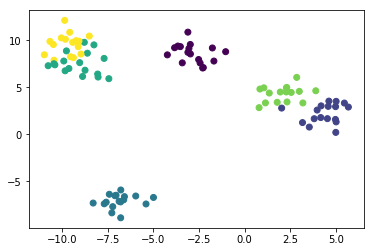

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y)

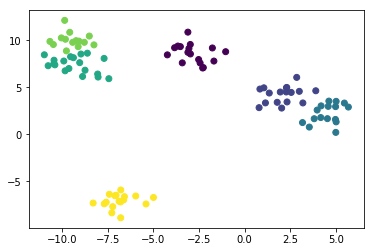

In [62]:
model = KMeansCustom(n_clusters=6)

errors = model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

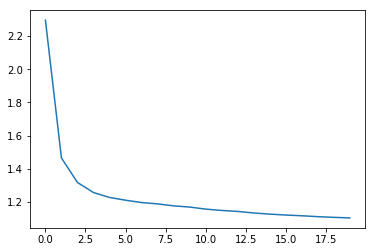

In [63]:
plt.plot(errors)